In [1]:
#| default_exp classical_computer_vision

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from pathlib import Path
from fastcore.all import *
import re
from collections import Counter
import os


In [14]:
path = Path(r'/home/hasan/Schreibtisch/projects/Infineon/projects/easy_pin_detection/data')
path.ls()

(#3) [Path('/home/hasan/Schreibtisch/projects/Infineon/projects/easy_pin_detection/data/X'),Path('/home/hasan/Schreibtisch/projects/Infineon/projects/easy_pin_detection/data/module_names'),Path('/home/hasan/Schreibtisch/projects/Infineon/projects/easy_pin_detection/data/y')]

In [15]:
pat = re.compile(r'(In|Out)_(\d+)_')

In [16]:
images = (path/'X').ls()
images

(#134) [Path('/home/hasan/Schreibtisch/projects/Infineon/projects/easy_pin_detection/data/X/VFV4.1.5.2_2023011721404957_ID_00001046948816506962301_In_57_r_1_FRONT_Pass-Img_02.png'),Path('/home/hasan/Schreibtisch/projects/Infineon/projects/easy_pin_detection/data/X/VFV4.1.5.2_2023020419152310_ID_00080027864816621172304_In_17_r_1_FRONT_Missing Lead-Img_02.png'),Path('/home/hasan/Schreibtisch/projects/Infineon/projects/easy_pin_detection/data/X/VFV4.1.5.2_2023020101265431_ID_00170042597816589112304_In_47_r_1_FRONT_Flying Lead-Img_02.png'),Path('/home/hasan/Schreibtisch/projects/Infineon/projects/easy_pin_detection/data/X/VFV4.1.8.0_2023020713202310_ID_00035042598816597222304_In_43_r_1_FRONT_Missing Lead-Img_02.png'),Path('/home/hasan/Schreibtisch/projects/Infineon/projects/easy_pin_detection/data/X/VFV4.1.5.2_2023011722563971_ID_00006045420816511592301_In_96_r_1_FRONT_Pass-Img_02.png'),Path('/home/hasan/Schreibtisch/projects/Infineon/projects/easy_pin_detection/data/X/VFV4.1.5.2_202302020

In [17]:
image_names = [i.name for i in images]
fn = image_names[0]
re.search(pat, fn).group(2)

'57'

In [18]:
module_names = {i.name:re.search(pat, i.name).group(2) for i in images if re.search(pat, i.name)}

In [19]:
Counter(module_names.values())

Counter({'57': 7,
         '17': 29,
         '47': 10,
         '43': 11,
         '96': 40,
         '55': 1,
         '53': 8,
         '122': 2,
         '85': 2,
         '21': 7,
         '25': 7,
         '105': 6,
         '75': 1,
         '51': 1,
         '86': 2})

# Create folder for each module

In [9]:
#for i in set(module_names.values()):
    #print(i)
    #module_path = (path/f'module_names/{i}')
    #module_path.mkdir(exist_ok=True, parents=True)

testing whether folders are created or not

In [10]:
(path/'module_names'/'96' ).ls()

(#40) [Path('/home/hasan/Schreibtisch/projects/Infineon/projects/easy_pin_detection/data/module_names/96/VFV4.1.5.2_2023011722563971_ID_00006045420816511592301_In_96_r_1_FRONT_Pass-Img_02.png'),Path('/home/hasan/Schreibtisch/projects/Infineon/projects/easy_pin_detection/data/module_names/96/VFV4.1.9.0_2023030109232925_In_96_old_and_new_with_new_ref_image._r_1_Additional Lead-Img_02.png'),Path('/home/hasan/Schreibtisch/projects/Infineon/projects/easy_pin_detection/data/module_names/96/VFV4.1.9.0_2023030109234870_In_96_old_and_new_with_new_ref_image._r_1_Additional Lead-Img_02.png'),Path('/home/hasan/Schreibtisch/projects/Infineon/projects/easy_pin_detection/data/module_names/96/VFV4.1.9.0_2023030109223196_In_96_old_and_new_with_new_ref_image._r_1_Additional Lead-Img_02.png'),Path('/home/hasan/Schreibtisch/projects/Infineon/projects/easy_pin_detection/data/module_names/96/VFV4.1.9.0_2023030109300125_In_96_old_and_new_with_new_ref_image._r_1_Additional Lead-Img_02.png'),Path('/home/hasan/

# Creating simulink from actual data to module folder


In [11]:
#for k, v in module_names.items():
    #target = path/'X'/k
    #symlink = path/'module_names'/v/k
    #os.symlink(target, symlink)

# Checking 96 module

In [ ]:
img = cv2.imread('input_image.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the edges using the Canny edge detection algorithm
edges = cv2.Canny(gray, 100, 200)

# Find the contours of the edges
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour
largest_contour = max(contours, key=cv2.contourArea)

# Get the bounding rectangle of the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the square from the original image
if w > h:
    square = img[y:y+w, x:x+w]
else:
    square = img[y:y+h, x:x+h]


hi
(1024, 1224)
hi
(1024, 1224)
hi
(1024, 1224)
hi
(1024, 1224)
hi
(1024, 1224)
hi
(1024, 1224)
hi
(1024, 1224)
hi
(1024, 1224)


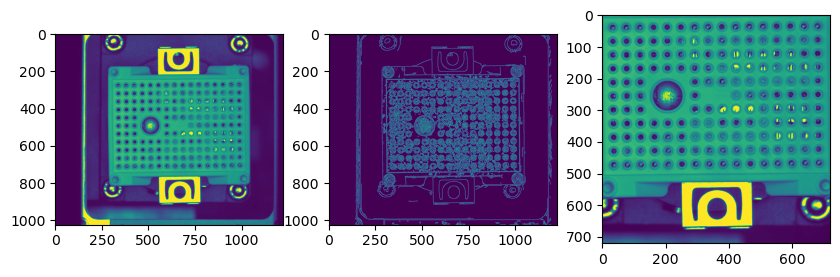

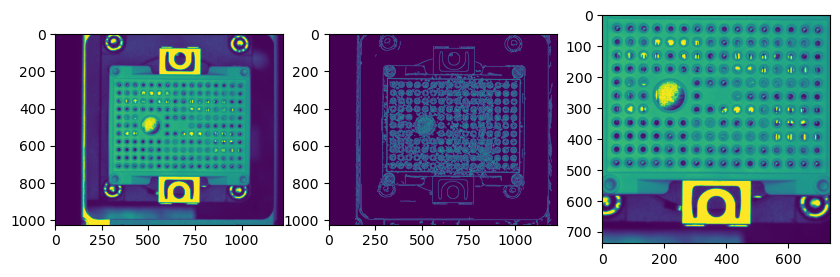

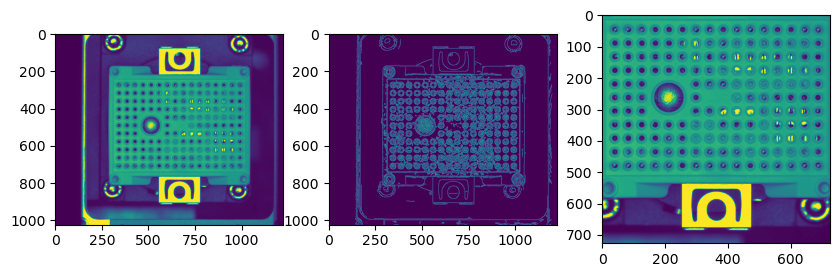

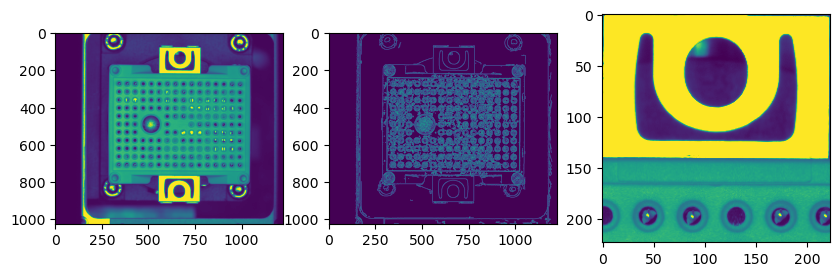

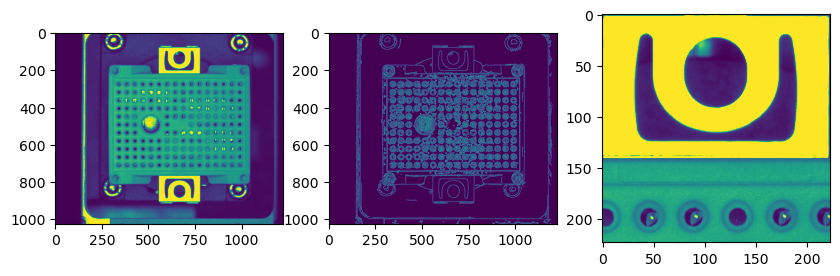

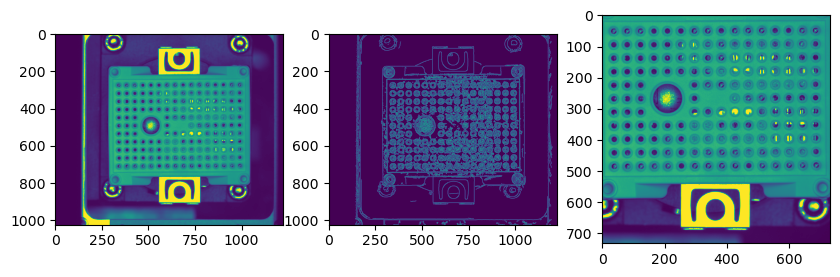

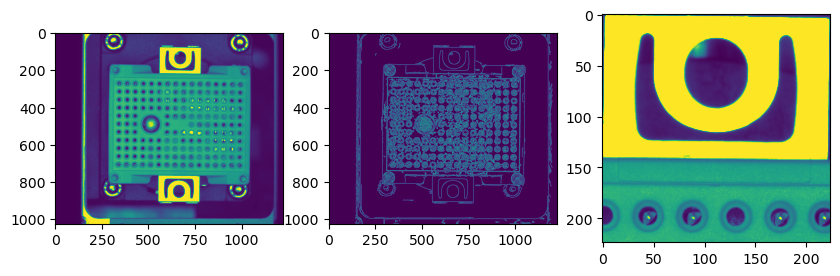

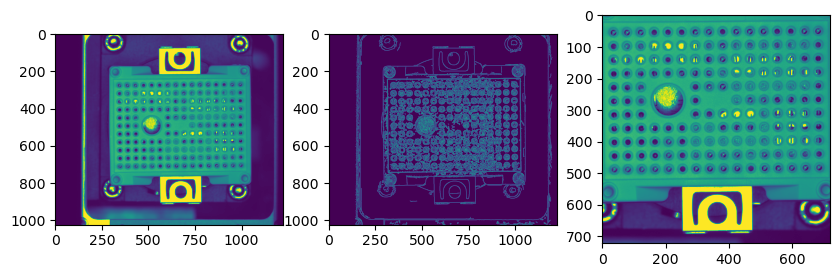

In [148]:
fns = (path/'module_names'/'96').ls()
for i in range(8):
    img = cv2.imread(str(fns[i]), cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, 15, 50)
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    if w > h:
        print('hi')
        square = img[y:y+w, x:x+w]
    else:
        square = img[y:y+h, x:x+h]

    #square = img[y:y+h, x:x+h]
    fig, ax = plt.subplots(1, 3, figsize=(10, 10))
    ax[0].imshow(img)
    ax[1].imshow(edges)
    ax[2].imshow(square)
    #plt.imshow(square)
    #plt.imshow(contours)
    #print(hierarchy.shape)
    print(img.shape)
    #plt.imshow(img)
    

(1024, 1224)


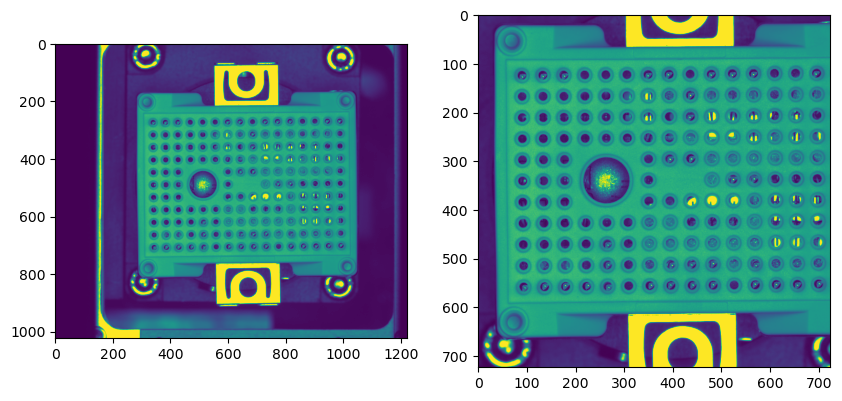

In [152]:
fns = (path/'module_names'/'96').ls()
for i in range(8):
    img = cv2.imread(str(fns[i]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Get the dimensions of the image
    height, width= img.shape

    # Calculate the length of the side of the square
    side_length = int(min(height, width) / 2**0.5)

    # Calculate the center of the image
    center_x, center_y = width // 2, height // 2

    # Calculate the coordinates of the top-left and bottom-right corners of the square
    x1, y1 = center_x - side_length//2, center_y - side_length//2
    x2, y2 = center_x + side_length//2, center_y + side_length//2

    # Crop the square from the original image
    square = img[y1:y2, x1:x2]
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(img)
    ax[1].imshow(square)
    #ax[2].imshow(square)
    #plt.imshow(square)
    #plt.imshow(contours)
    #print(hierarchy.shape)
    print(img.shape)
    #plt.imshow(img)
    break
    

# Searching biggest square

In [208]:

def detect_square_edges(image_path):
    # Load the image and convert it to grayscale
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur to the image
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding to the blurred image
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    
    # Detect edges using Canny edge detection
    #edges = cv2.Canny(thresh, 30, 100)
    #edges = sobel_edge_detection(thresh)
    edges = schar_edge_detection(thresh)
    
    # Detect contours in the edges image
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find contours with four corners (a square shape)
    squares = []
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.04 * cv2.arcLength(cnt, True), True)
        if len(approx) == 4:
            squares.append(approx)

    # Draw the squares on the original image
    img_with_squares = np.copy(img)
    cv2.drawContours(img_with_squares, squares, -1, (0, 255, 0), 3)
    
    return img_with_squares

- Apply image preprocessing: You can try applying some image preprocessing techniques to improve the edge detection results. For example, you can apply Gaussian blur to smooth the image and reduce noise, or apply thresholding to remove low contrast areas. You can also try converting the image to a different color space, such as HSV or LAB, to make certain features easier to detect.

- Use a different edge detection algorithm: If the Canny edge detector is not giving good results, you can try using a different edge detection algorithm. For example, you can try the Sobel operator or the Scharr operator, which are also available in OpenCV.

In [209]:
# Apply Gaussian blur to the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding to the blurred image
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Detect edges using Canny edge detection on the thresholded image
edges = cv2.Canny(thresh, 30, 100)

NameError: name 'gray' is not defined

In [210]:
def sobel_edge_detection(gray):
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    edges = cv2.magnitude(sobelx, sobely)
    edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return edges

In [211]:
# Detect edges using the Scharr operator
def schar_edge_detection(gray):
    scharrx = cv2.Scharr(gray, cv2.CV_64F, 1, 0)
    scharry = cv2.Scharr(gray, cv2.CV_64F, 0, 1)
    edges = cv2.magnitude(scharrx, scharry)
    edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return edges

In [12]:
fns = (path/'module_names'/'96').ls()
for i in range(8):
    #img = detect_square_edges(str(fns[i]))
    img = cv2.imread(str(fns[i]))

    # Display the image and wait for the user to select a ROI
    cv2.imshow("Image", img)
    roi = cv2.selectROI("Image", img, fromCenter=False, showCrosshair=True)

    x, y, w, h = roi
    roi_img = img[y:y+h, x:x+w]

    # Save the ROI as a template image
    cv2.imwrite("template.jpg", roi_img)

    # Close all windows
    cv2.destroyAllWindows()#img = cv2.imread(str(fns[i]), cv2.IMREAD_GRAYSCALE)
    #edges = cv2.Canny(img, 15, 50)
    break

error: OpenCV(4.7.0) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


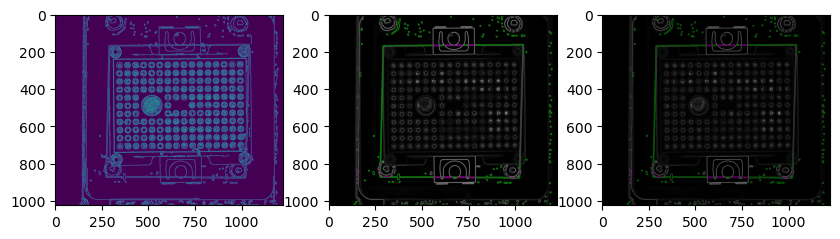

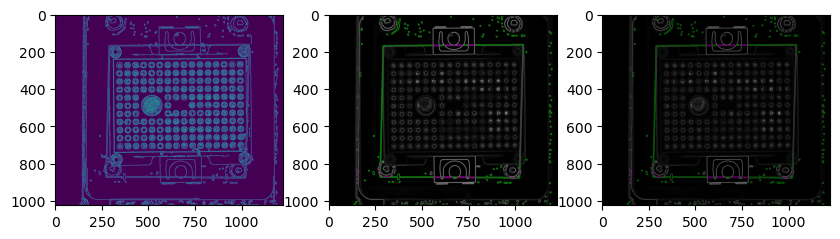

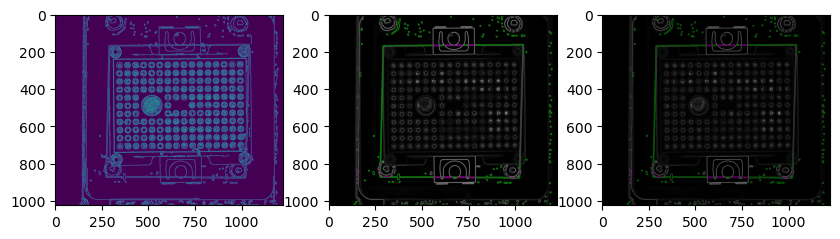

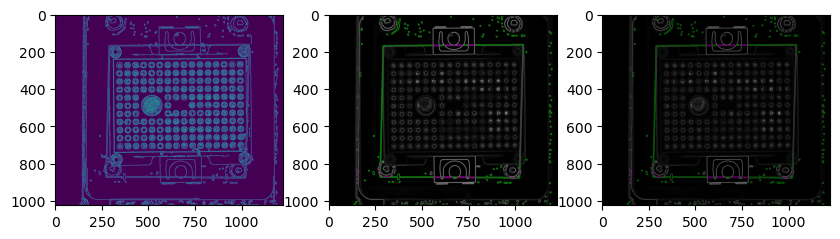

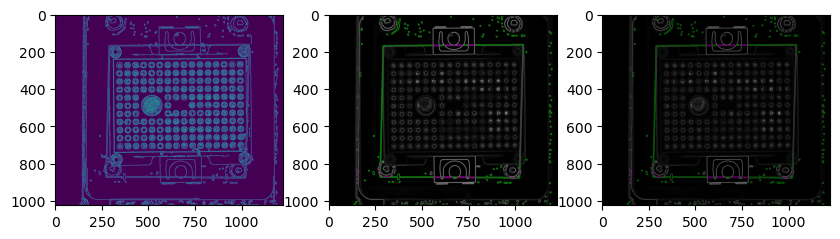

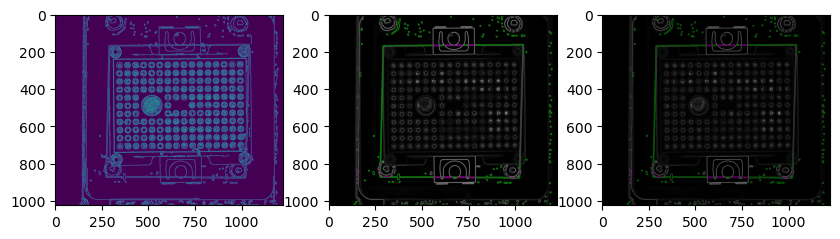

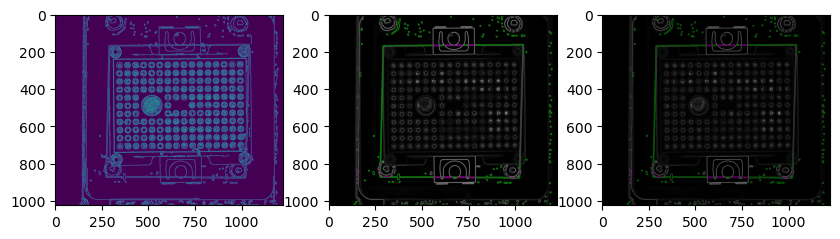

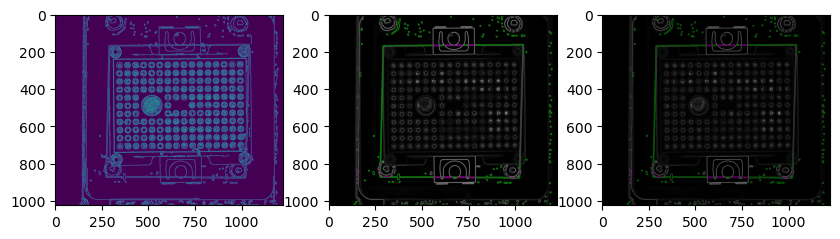

In [215]:
fns = (path/'module_names'/'96').ls()
for i in range(8):
    #img = detect_square_edges(str(fns[i]))
    #img = cv2.imread(str(fns[i]), cv2.IMREAD_GRAYSCALE)
    can = cv2.Canny(img, 10, 100)
    sob = sobel_edge_detection(img)
    schar = schar_edge_detection(img)
    fig, ax = plt.subplots(1, 3, figsize=(10, 10))
    ax[0].imshow(can)
    ax[1].imshow(sob)
    ax[2].imshow(schar)
    #break

# Patching the image

/tmp/ipykernel_215954/155123804.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


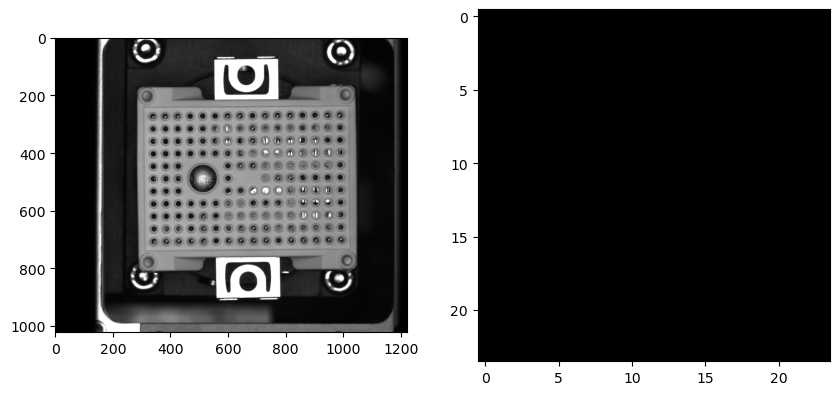

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [29]:
fns = (path/'module_names'/'96').ls()
for i in range(8):
    img = cv2.imread(str(fns[i]))
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    img = cv2.imread(str(fns[i]))
    ax[0].imshow(img)

    # Define the size of each patch
    patch_size = 50
    num_rows = int(np.ceil(img.shape[0] / patch_size))
    num_cols = int(np.ceil(img.shape[1] / patch_size))

    # Loop through the image and extract patches
    for y in range(0, img.shape[0], patch_size):
        for x in range(0, img.shape[1], patch_size):
            # Define the area to be patched
            patch_area = (x, y, x+patch_size, y+patch_size)

            # Extract the pixels from the original image within the patch area
            patch = img[patch_area[1]:patch_area[3], patch_area[0]:patch_area[2]]
            plt.figure()

    break



In [ ]:
# Apply Hough transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# Find all possible squares in the image
squares = []
for i in range(len(lines)):
    for j in range(i+1, len(lines)):
        for k in range(j+1, len(lines)):
            for l in range(k+1, len(lines)):
                line1 = lines[i][0]
                line2 = lines[j][0]
                line3 = lines[k][0]
                line4 = lines[l][0]
                if abs(line1[1] - line2[1]) < 0.1 and abs(line3[1] - line4[1]) < 0.1 and abs(line1[1] - line3[1]) < 0.1:
                    intersection1 = np.array([[line1[0]*np.cos(line1[1]), line1[0]*np.sin(line1[1])],
                                              [line2[0]*np.cos(line2[1]), line2[0]*np.sin(line2[1])]])
                    intersection2 = np.array([[line3[0]*np.cos(line3[1]), line3[0]*np.sin(line3[1])],
                                              [line4[0]*np.cos(line4[1]), line4[0]*np.sin(line4[1])]])
                    point1 = cv2.solve(intersection1, np.ones((2,1)), flags=cv2.DECOMP_SVD)[1]
                    point2 = cv2.solve(intersection2, np.ones((2,1)), flags=cv2.DECOMP_SVD)[1]
                    point1 = (int(point1[0][0]), int(point1[1][0]))
                    point2 = (int(point2[0][0]), int(point2[1][0]))
                    squares.append((point1, point2))

# Find the biggest square
biggest_square = None
max_area = 0
for square in squares:
    x1, y1 = square[0]
    x2, y2 = square[1]
    area = (x2 - x1) * (y2 - y1)
    if area > max_area:
        biggest_square = square
        max_area = area

# Crop the biggest square from the original image
x1, y1 = biggest_square[0]
x2, y2 = biggest_square[1]
square_img = img[y1:y2, x1:x2]